# KNN - K-Nearest-Neighbors

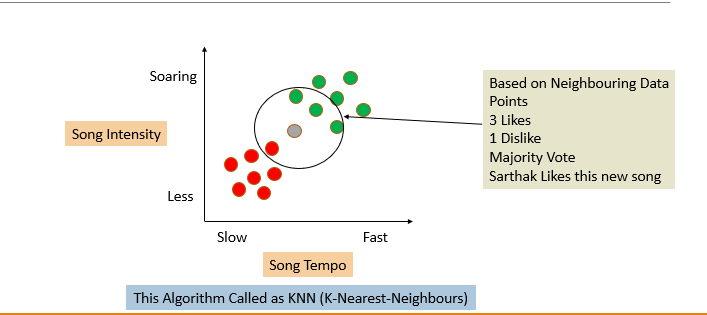

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Target - Drug

### Step 2 - Perform Basic Data quality check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X and Y(Drug)

In [6]:
X = df.drop(columns=["Drug"])
Y = df[["Drug"]]

In [7]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [8]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [9]:
Y.value_counts()

Drug 
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

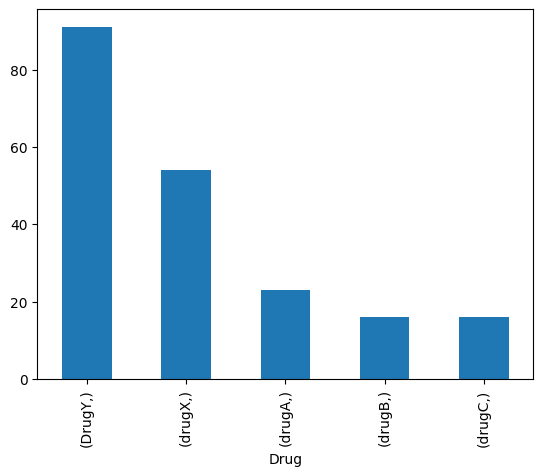

In [10]:
Y.value_counts().plot(kind="bar")

### Step 4 - Apply Preprocessing on X

In [11]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
cat

['Sex', 'BP', 'Cholesterol']

In [14]:
con

['Age', 'Na_to_K']

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [ ]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [18]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,0.0,0.0,0.0,0.0
1,0.162699,-0.415145,1.0,1.0,0.0,0.0
2,0.162699,-0.828558,1.0,1.0,0.0,0.0
3,-0.988614,-1.149963,0.0,0.0,1.0,0.0
4,1.011034,0.271794,0.0,1.0,0.0,0.0


### Step 5 - Apply Train Test split
test_size = 0.4

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.4, random_state=21)

In [22]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
164,-1.715759,0.405574,1.0,0.0,0.0,1.0
68,0.586866,1.189795,1.0,0.0,1.0,0.0
97,0.708057,1.292073,0.0,0.0,0.0,0.0
10,0.162699,-0.599162,0.0,1.0,0.0,0.0
189,1.192821,0.672717,1.0,0.0,0.0,1.0


In [23]:
ytrain.head()

,Drug
164,DrugY
68,DrugY
97,DrugY
10,drugC
189,DrugY


In [24]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
144,-0.322065,-0.891007,1.0,0.0,0.0,0.0
9,-0.079683,0.455672,1.0,1.0,0.0,1.0
17,-0.079683,-0.293162,1.0,0.0,0.0,0.0
20,0.768653,0.422366,1.0,1.0,0.0,1.0
45,1.314011,-1.107081,0.0,0.0,1.0,1.0


In [25]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


In [26]:
xtrain.shape

(120, 6)

In [27]:
xtest.shape

(80, 6)

### Step 6 - Model Building

### KNN 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=51)

model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=51)

In [29]:
model1.score(xtrain, ytrain)

0.65

In [30]:
model1.score(xtest, ytest)

0.55

### Hyperparameter tuning for KNN

In [31]:
params = {"n_neighbors": [6, 7, 8, 9, 10, 11, 12]}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
model_knn = KNeighborsClassifier()

rscv = RandomizedSearchCV(
    model_knn, param_distributions=params, cv=5, scoring="f1_macro", n_jobs=-1)

rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [6, 7, 8, 9, 10, 11,
                                                        12]},
                   scoring='f1_macro')

In [34]:
rscv.best_params_

{'n_neighbors': 8}

In [35]:
rscv.best_score_

np.float64(0.8295562987736901)

In [36]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=8)

### Model evaluation KNN

In [37]:
ypred_test = best_knn.predict(xtest)

In [38]:
ypred_test[0:5]

array(['drugA', 'DrugY', 'drugA', 'DrugY', 'drugX'], dtype=object)

In [39]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


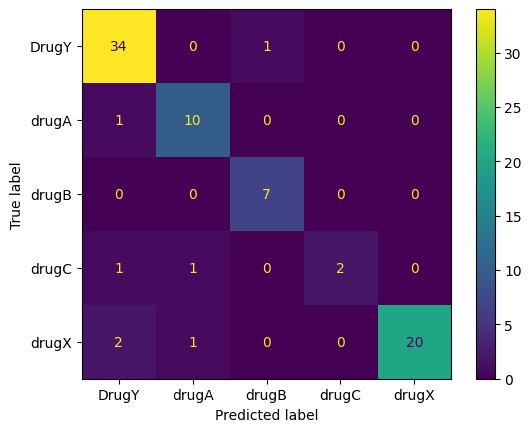

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

       DrugY       0.89      0.97      0.93        35
       drugA       0.83      0.91      0.87        11
       drugB       0.88      1.00      0.93         7
       drugC       1.00      0.50      0.67         4
       drugX       1.00      0.87      0.93        23

    accuracy                           0.91        80
   macro avg       0.92      0.85      0.87        80
weighted avg       0.92      0.91      0.91        80



### Clearly from above the model is good because f1 macro = 0.87 > 0.8